In [3]:
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#sns.set_palette('viridis')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [4]:
train_df = pd.read_csv('Datasets/train_dataset.csv')
test_x = pd.read_csv('Datasets/test_dataset.csv')
test_y = pd.read_csv('Datasets/test_y.csv')

### EDA part has already been done in the v1 notebook
-Here we will try a different appraoch towards preprocessing and feature engineering

In [3]:
train_df.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


### Let's first deal with the missing values in all the columns

In [4]:
train_df.isnull().sum()[train_df.isnull().sum()!=0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

In [5]:
test_x.isnull().sum()[test_x.isnull().sum()!=0]

year_built                     92
energy_star_rating           2254
direction_max_wind_speed     8575
direction_peak_wind_speed    8575
max_wind_speed               8575
days_with_fog                9117
dtype: int64

In [6]:
### Let us first delete all the columns that have more than 50% of missing values
### We have only 4 columns so we will do it manually for now
### Else, we would have used a for loop and set a threshold value to remove columns iteratively

cols_to_drop = ['direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog']

train_df.drop(cols_to_drop, axis=1, inplace=True)
test_x.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
### Now we only have year built and energy star rating with missing values
### Let's look at energy star rating

train_df.energy_star_rating.unique()

array([ 11.,  45.,  97.,  46., 100.,  nan,  56.,  99.,  98.,  83.,  51.,
        81.,  29.,  13.,  93.,  59.,  82.,  53.,  60.,  26.,  44.,  55.,
        86.,  25.,  94.,  74.,  96.,  90.,  71.,  70.,  65.,  77.,  57.,
        61.,  54.,   6.,  75.,  73.,  91.,  92.,  85.,  88.,  89.,  67.,
        78.,  76.,  87.,  33.,  48.,  58.,  63.,  39.,  52.,  23.,  42.,
        64.,  69.,  62.,  84.,  24.,  80.,  15.,  95.,  66.,  72.,  79.,
        27.,  41.,  38.,  10.,  14.,  35.,   3.,   7.,  43.,  31.,   4.,
        36.,  49.,  17.,   0.,   1.,  40.,  50.,  12.,  37.,  32.,  22.,
        34.,  68.,   5.,  16.,  30.,  47.,   9.,  19.,   2.,  21.,  28.,
        18.,  20.,   8.])

In [11]:
test_x.energy_star_rating.unique()

array([ 37.,  55.,   1.,  34.,  35.,  28.,  41.,  62.,  17.,  44.,  60.,
        nan,  82.,  89.,  69.,  66.,  53.,  57.,  79.,  40.,  56.,  50.,
        95.,  81.,  51.,  78.,  61.,  18.,  86.,  67.,  72.,  74.,  65.,
        68.,  30.,  47.,  52.,  87.,  49.,  39.,  19.,  21.,  88.,  32.,
        23.,  77., 100.,  59.,  12.,  97.,  84.,  93.,   8.,  63.,  26.,
        36.,   2.,  46.,  80.,  58.,  85.,  70.,  73.,   9.,  96.,  43.,
        16.,  10.,  64.,  13.,  91.,  76.,  38.,  71.,  14.,   7.,  24.,
        33.,   6.,   3.,  94.,  99.,  75.,  11.,  27.,  98.,  54.,  90.,
        83.,  42.,  22.,  31.,  48.,  15.,  92.,  25.,   5.,  29.,  20.,
         4.,  45.])

<AxesSubplot:xlabel='energy_star_rating', ylabel='Count'>

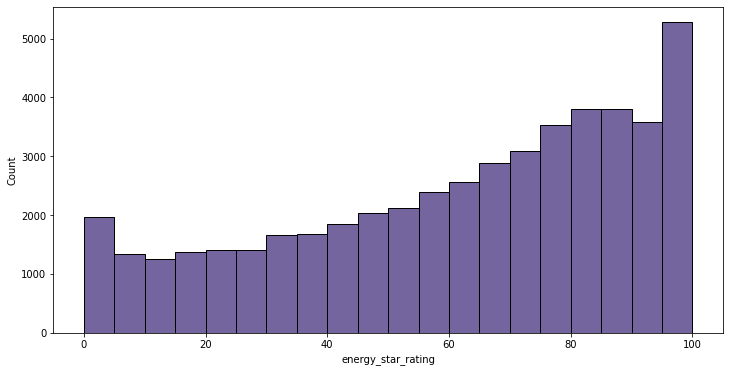

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['energy_star_rating'], bins = 20)

<AxesSubplot:xlabel='energy_star_rating', ylabel='Count'>

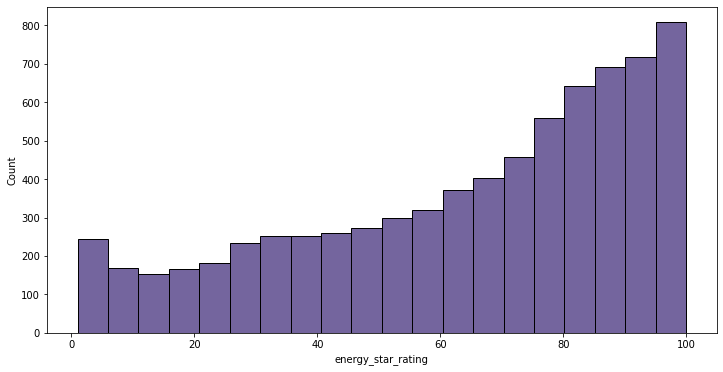

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(test_x['energy_star_rating'], bins = 20)

In [17]:
### We have values from 0 to 100 in energy star rating
### The distribution is skewed towards left so we cannot use mean or median imputation
### As this will change the distribution of the column altogether
### Let's impute with an off value

train_df['energy_star_rating'].fillna(-1, inplace=True)
test_x['energy_star_rating'].fillna(-1, inplace=True)

<AxesSubplot:xlabel='energy_star_rating', ylabel='Count'>

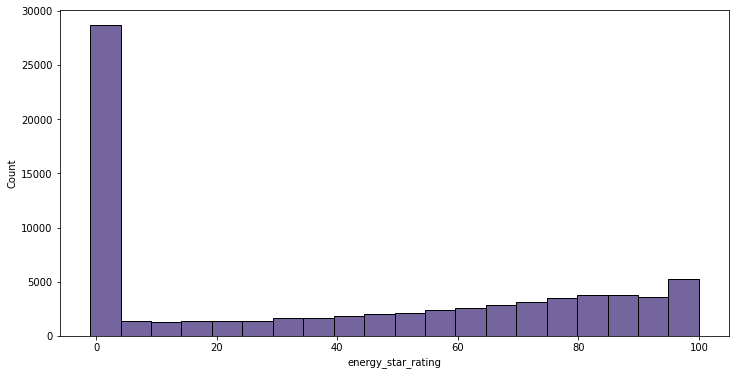

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(train_df['energy_star_rating'], bins = 20)

In [19]:
train_df['energy_star_rating'].value_counts()

-1.0      26709
 100.0     1946
 1.0        985
 79.0       782
 89.0       781
          ...  
 21.0       252
 16.0       248
 11.0       247
 10.0       237
 0.0          1
Name: energy_star_rating, Length: 102, dtype: int64

In [20]:
### This has again changed the distribution of the data
### We will again change back the values and use KNN Imputer

train_df['energy_star_rating'] = train_df['energy_star_rating'].replace(to_replace=-1, value=np.nan)
test_x['energy_star_rating'] = test_x['energy_star_rating'].replace(to_replace=-1, value=np.nan)

In [21]:
### We have very little values in year built column
### Also, year built is not of much use as well
### Let's drop the column altogether

train_df.drop('year_built', axis=1, inplace=True)
test_x.drop('year_built', axis=1, inplace=True)

In [32]:
### Using KNN Imputer to replace nulls in energy star rating column

from sklearn.impute import KNNImputer

train_new = train_df.copy()
test_new = test_x.copy()

In [33]:
train_new.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36,50.5,68,35,50.589286,73,40,53.693548,80,41,55.5,78,46,56.854839,84,50,60.5,90,52,62.725806,84,52,62.16129,85,52,64.65,90,47,63.016129,83,43,53.8,72,36,49.274194,71,115,2960,16.59,0.0,0,56.972603,0,0,0,0,14,0,0,0,3.899395,4


In [35]:
train_num = train_new.drop(['Year_Factor', 'State_Factor', 'building_class', 'facility_type'], axis=1)
test_num = test_new.drop(['Year_Factor', 'State_Factor', 'building_class', 'facility_type'], axis=1)

train_cat = train_new[['Year_Factor', 'State_Factor', 'building_class', 'facility_type']]
test_cat = test_new[['Year_Factor', 'State_Factor', 'building_class', 'facility_type']]

In [37]:
imputer = KNNImputer(n_neighbors = 7)
train_imputed = imputer.fit_transform(train_num)
train_imputed = pd.DataFrame(train_imputed, columns=train_num.columns)
train_imputed['energy_star_rating'].isnull().sum()

0

In [40]:
train_imputed.head()

,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,id
0,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615,0.0
1,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150,1.0
2,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619,2.0
3,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926,3.0
4,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395,4.0


In [39]:
import pickle

with open('Imputer', 'wb') as f: 
    pickle.dump(imputer, f)

In [43]:
test_num['site_eui'] = test_y['site_eui'].values

test_imputed = imputer.transform(test_num)
test_imputed = pd.DataFrame(test_imputed, columns = test_num.columns)

print(test_imputed['energy_star_rating'].isnull().sum())

test_imputed.head()

0


,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,id,site_eui
0,28484.0,37.0,2.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,75757.0,166.588554
1,21906.0,55.0,45.7,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,75758.0,259.381565
2,16138.0,1.0,59.1,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,75759.0,158.537090
3,97422.0,34.0,35.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,75760.0,261.441520
4,61242.0,35.0,1.8,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,25.24,0.0,0.0,59.894521,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,75761.0,242.967711


In [46]:
### Let's now conact back the cat dfs and imputed dfs

train_clean = pd.concat([train_cat, train_imputed], axis = 1)
test_clean = pd.concat([test_cat, test_imputed], axis = 1)

In [47]:
### Now, let's drop the ID column and site eui (from test)

train_clean.drop('id', axis=1, inplace=True)
test_clean.drop(['id', 'site_eui'], axis=1, inplace=True)

## Feature Engineering
- Let's combine multiple columns to make a new column that is more significant

In [51]:
### We have columns floor area and elevation
### Floor area is the area of the base floor, while elevation is the height / floors of the building

train_clean[['floor_area', 'ELEVATION']].describe()

,floor_area,ELEVATION
count,7.575700e+04,75757.000000
mean,1.659839e+05,39.506323
std,2.468758e+05,60.656596
min,9.430000e+02,-6.400000
25%,6.237900e+04,11.900000
50%,9.136700e+04,25.000000
75%,1.660000e+05,42.700000
max,6.385382e+06,1924.500000


In [52]:
### We have elevation with values lower than 0 as well
### This is possible if the building / site is underground
### However, let check more about the negative values here

train_clean[train_clean['ELEVATION'] < 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
1064,3,State_1,Commercial,Education_Uncategorized,54000.0,77.571429,-6.4,20.0,46.483871,69.0,28.0,49.178571,69.0,35.0,60.435484,85.0,38.0,63.2,92.0,44.0,69.693548,96.0,61.0,80.216667,108.0,66.0,83.33871,103.0,65.0,81.241935,99.0,48.0,76.683333,97.0,38.0,64.16129,84.0,38.0,56.916667,79.0,26.0,50.645161,74.0,2292.0,2100.0,2.86,0.0,0.0,65.269863,11.0,0.0,0.0,0.0,154.0,82.0,8.0,0.0,45.900616
1065,3,State_1,Commercial,Education_Uncategorized,43594.0,72.142857,-6.4,20.0,46.483871,69.0,28.0,49.178571,69.0,35.0,60.435484,85.0,38.0,63.2,92.0,44.0,69.693548,96.0,61.0,80.216667,108.0,66.0,83.33871,103.0,65.0,81.241935,99.0,48.0,76.683333,97.0,38.0,64.16129,84.0,38.0,56.916667,79.0,26.0,50.645161,74.0,2292.0,2100.0,2.86,0.0,0.0,65.269863,11.0,0.0,0.0,0.0,154.0,82.0,8.0,0.0,43.182804


In [57]:
### There are only 2 values and almost completely identical to each other
### Let's check the values for +6.4 elevation (if present)

train_clean[train_clean['ELEVATION'].between(6.0, 7.0, inclusive = False)]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
999,2,State_1,Commercial,Education_Uncategorized,34204.0,86.142857,6.1,19.0,46.887097,71.0,25.0,49.362069,78.0,30.0,51.080645,73.0,32.0,56.350000,86.0,37.0,59.870968,86.0,39.0,64.316667,98.0,46.0,65.322581,94.0,45.0,65.370968,92.0,41.0,62.566667,93.0,41.0,61.806452,98.0,32.0,54.283333,81.0,25.0,47.306452,70.0,204.0,3011.0,22.14,0.0,0.0,57.060109,18.0,1.0,0.0,0.0,54.0,8.0,0.0,0.0,21.867666
2230,3,State_1,Commercial,Education_Uncategorized,4899.0,28.714286,6.1,24.0,44.112903,66.0,30.0,49.107143,71.0,37.0,56.935484,79.0,44.0,63.833333,93.0,47.0,68.435484,94.0,50.0,73.400000,108.0,53.0,76.193548,109.0,53.0,74.725806,104.0,48.0,71.100000,101.0,41.0,62.774194,85.0,36.0,55.566667,80.0,22.0,45.322581,70.0,1319.0,2369.0,5.81,0.0,0.0,61.850685,21.0,0.0,0.0,0.0,148.0,61.0,13.0,0.0,42.805322
2231,3,State_1,Commercial,Education_Uncategorized,23804.0,60.285714,6.1,22.0,43.983871,66.0,29.0,49.410714,74.0,34.0,56.338710,78.0,41.0,64.050000,93.0,44.0,68.112903,98.0,50.0,73.400000,109.0,50.0,76.967742,108.0,52.0,74.564516,104.0,45.0,70.616667,102.0,38.0,61.290323,87.0,31.0,54.733333,79.0,20.0,44.451613,73.0,1341.0,2509.0,4.00,0.0,0.0,61.546575,38.0,0.0,0.0,0.0,149.0,68.0,15.0,0.0,50.449809
2232,3,State_1,Commercial,Education_Uncategorized,17039.0,66.857143,6.1,22.0,43.983871,66.0,29.0,49.410714,74.0,34.0,56.338710,78.0,41.0,64.050000,93.0,44.0,68.112903,98.0,50.0,73.400000,109.0,50.0,76.967742,108.0,52.0,74.564516,104.0,45.0,70.616667,102.0,38.0,61.290323,87.0,31.0,54.733333,79.0,20.0,44.451613,73.0,1341.0,2509.0,4.00,0.0,0.0,61.546575,38.0,0.0,0.0,0.0,149.0,68.0,15.0,0.0,17.517481
3537,4,State_1,Commercial,Education_Uncategorized,48919.0,79.714286,6.1,33.0,47.612903,70.0,32.0,49.785714,65.0,36.0,51.500000,67.0,37.0,52.150000,80.0,43.0,56.580645,78.0,45.0,56.333333,69.0,51.0,58.709677,67.0,52.0,59.129032,71.0,46.0,59.533333,80.0,45.0,58.967742,80.0,39.0,54.216667,66.0,30.0,52.806452,69.0,4.0,3636.0,37.50,0.0,0.0,54.809589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.831297
3538,4,State_1,Commercial,Education_Uncategorized,6800.0,21.142857,6.1,33.0,47.612903,70.0,32.0,49.785714,65.0,36.0,51.500000,67.0,37.0,52.150000,80.0,43.0,56.580645,78.0,45.0,56.333333,69.0,51.0,58.709677,67.0,52.0,59.129032,71.0,46.0,59.533333,80.0,45.0,58.967742,80.0,39.0,54.216667,66.0,30.0,52.806452,69.0,4.0,3636.0,37.50,0.0,0.0,54.809589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.346797


In [58]:
### The values are completely identical for both + & - values in ELEVATION
### Let's check for test data as well

test_clean[test_clean['ELEVATION'] < 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F


In [59]:
### Luckily we don't have such values in test data

train_clean['ELEVATION'] = np.abs(train_clean['ELEVATION'])
train_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395


In [60]:
### Let's create a new column with floor area and elevation columns

train_clean['total_carpet_area'] = train_clean['floor_area'] * train_clean['ELEVATION']
test_clean['total_carpet_area'] = test_clean['floor_area'] * test_clean['ELEVATION']

<AxesSubplot:xlabel='total_carpet_area', ylabel='site_eui'>

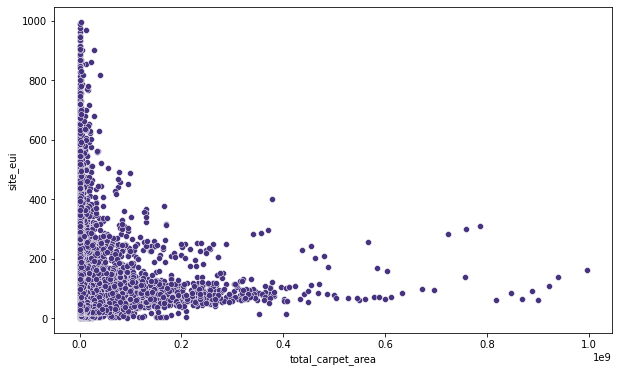

In [62]:
### Let's see how does the newly added column looks like

plt.figure(figsize=(10, 6))
sns.scatterplot(x = train_clean['total_carpet_area'], y = train_clean['site_eui'])

<AxesSubplot:xlabel='site_eui', ylabel='Count'>

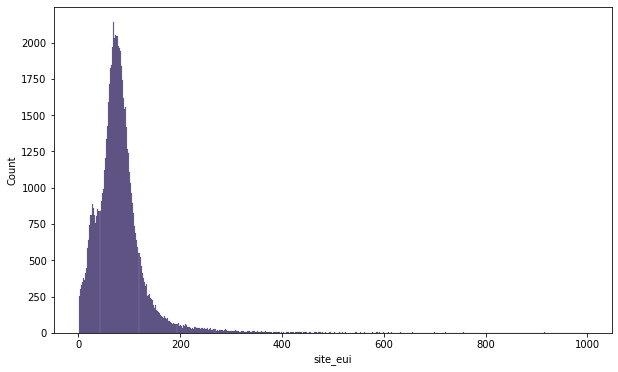

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(train_clean['site_eui'])

<AxesSubplot:xlabel='total_carpet_area', ylabel='Count'>

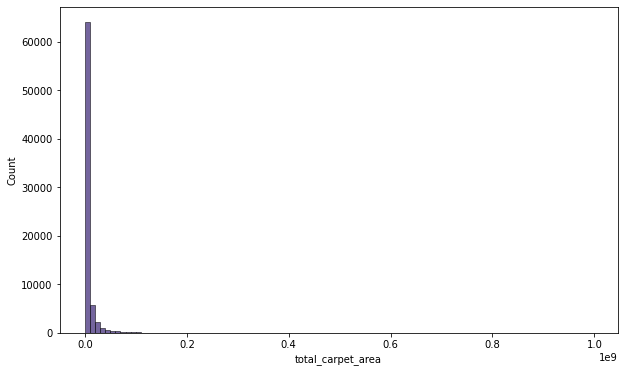

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(train_clean['total_carpet_area'], bins = 100)

In [72]:
train_clean['total_carpet_area'].describe()

count    7.575700e+04
mean     8.021889e+06
std      2.686769e+07
min      6.120000e+03
25%      7.261856e+05
50%      2.152080e+06
75%      5.332730e+06
max      9.958414e+08
Name: total_carpet_area, dtype: float64

In [73]:
### Let's now look at Facility Type

train_clean['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

In [76]:
train_clean['facility_category'] = train_clean['facility_type'].apply(lambda x: x.split('_')[0])
train_clean['facility_category'].unique()

array(['Grocery', 'Warehouse', 'Retail', 'Education', 'Office', 'Data',
       'Commercial', 'Mixed', 'Industrial', 'Laboratory', 'Public',
       'Lodging', 'Health', 'Religious', 'Parking', 'Service', 'Food',
       'Nursing', '5plus', 'Multifamily', '2to4'], dtype=object)

In [77]:
train_clean[['facility_type', 'facility_category']]

,facility_type,facility_category
0,Grocery_store_or_food_market,Grocery
1,Warehouse_Distribution_or_Shipping_center,Warehouse
2,Retail_Enclosed_mall,Retail
3,Education_Other_classroom,Education
4,Warehouse_Nonrefrigerated,Warehouse
...,...,...
75752,Office_Uncategorized,Office
75753,5plus_Unit_Building,5plus
75754,Commercial_Other,Commercial
75755,Commercial_Other,Commercial


In [80]:
train_clean.groupby('facility_category')['site_eui'].mean()

facility_category
2to4            31.876915
5plus           36.737785
Commercial      93.701532
Data           339.734876
Education       73.622604
Food           147.390451
Grocery        241.135162
Health         223.896683
Industrial     125.345295
Laboratory     329.448470
Lodging         99.805438
Mixed           83.882984
Multifamily     83.878522
Nursing        131.313887
Office          78.599046
Parking         67.351241
Public         111.459684
Religious       44.560675
Retail          83.134903
Service        125.998490
Warehouse       37.190052
Name: site_eui, dtype: float64

<AxesSubplot:xlabel='facility_category', ylabel='site_eui'>

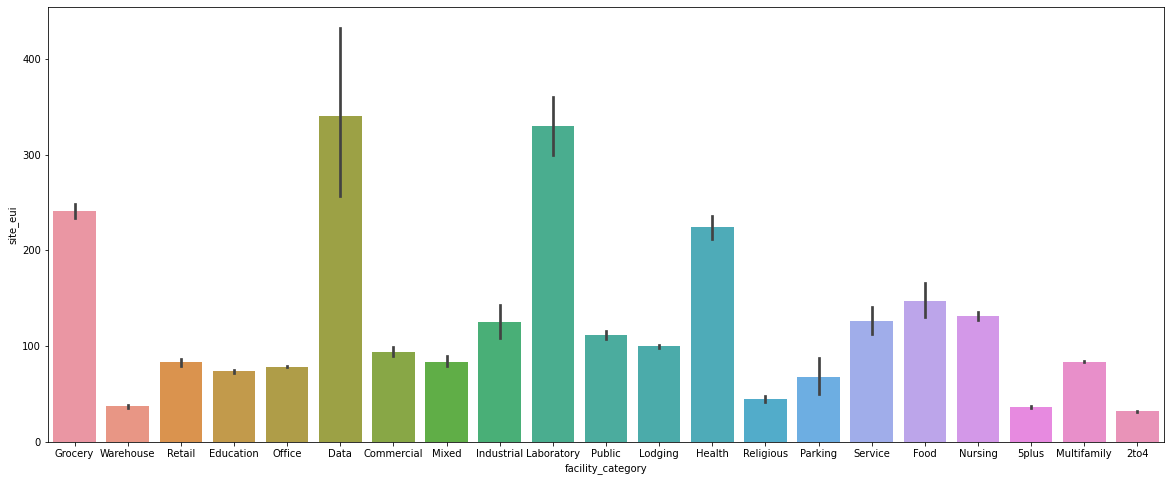

In [90]:
plt.figure(figsize=(20, 8))
sns.barplot(x = train_clean['facility_category'], y = train_clean['site_eui'])

In [91]:
### Let's do the same for test set as well

test_clean['facility_category'] = test_clean['facility_type'].apply(lambda x: x.split('_')[0])

In [92]:
train_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,total_carpet_area,facility_category
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615,146980.8,Grocery
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150,493200.0,Warehouse
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619,504045.0,Retail
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926,99585.0,Education
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395,158400.0,Warehouse


In [93]:
train_df.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'energy_star_rating', 'ELEVATION', 'january_min_temp',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdep

In [101]:
temp_df = train_clean[['cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inches',
       'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F',
       'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F',
       'days_above_110F', 'site_eui']]

temp_df.head()

,cooling_degree_days,heating_degree_days,precipitation_inches,snowfall_inches,snowdepth_inches,avg_temp,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui
0,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615
1,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150
2,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619
3,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926
4,115.0,2960.0,16.59,0.0,0.0,56.972603,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395


<AxesSubplot:>

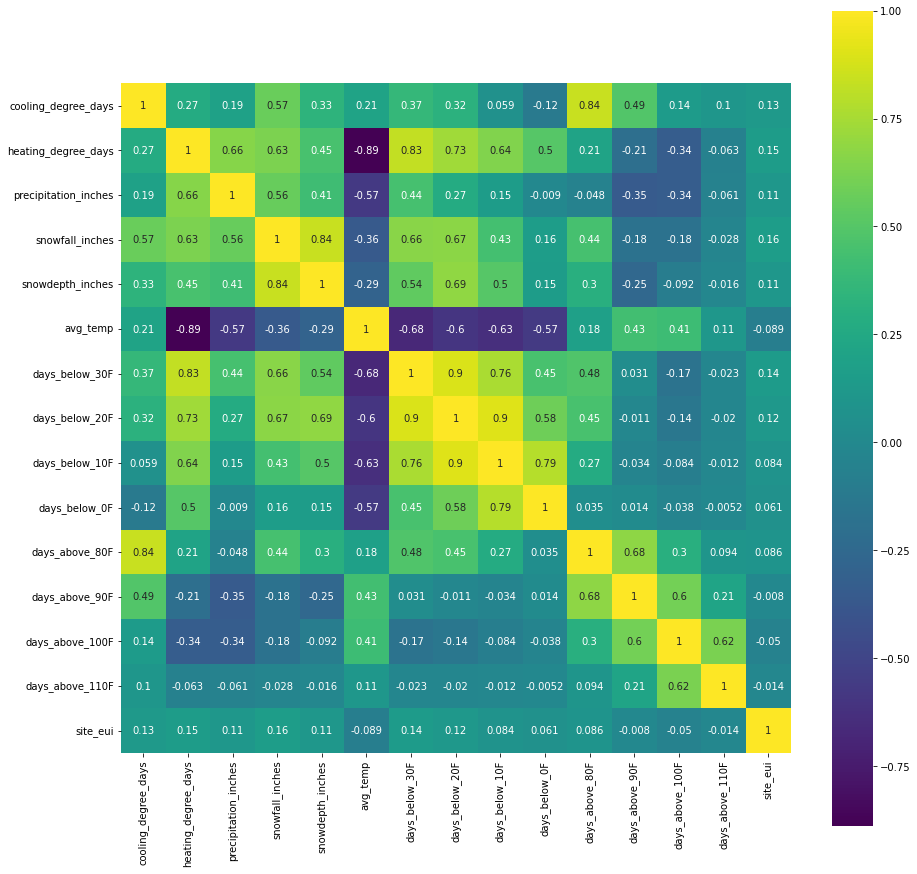

In [103]:
plt.figure(figsize=(15, 15))
sns.heatmap(temp_df.corr(), annot = True, square = True, cmap = 'viridis')

<AxesSubplot:>

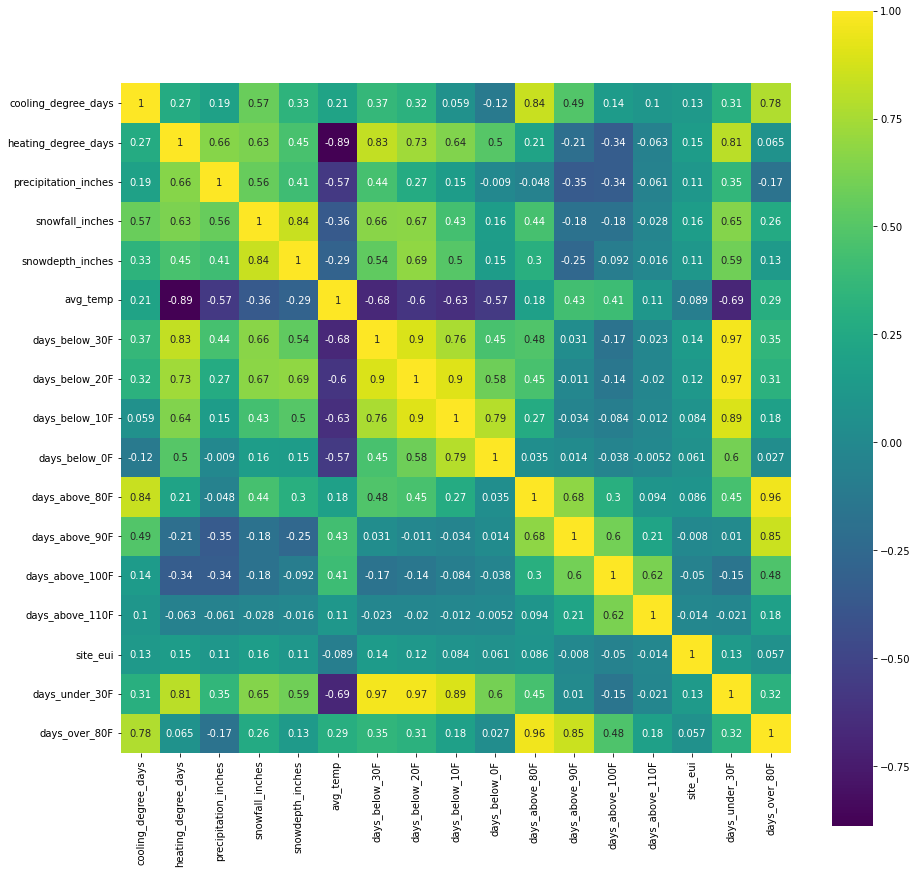

In [113]:
temp_df['days_under_30F'] = temp_df['days_below_30F'] + temp_df['days_below_20F'] + temp_df['days_below_10F'] + temp_df['days_below_0F']
temp_df['days_over_80F'] = temp_df['days_above_80F'] + temp_df['days_above_90F'] + temp_df['days_above_100F'] + temp_df['days_above_110F']

plt.figure(figsize=(15, 15))
sns.heatmap(temp_df.corr(), annot = True, square = True, cmap = 'viridis')

In [114]:
temp_df['days_below_30F'].describe()

count    75757.000000
mean        48.756511
std         27.587124
min          0.000000
25%         22.000000
50%         50.000000
75%         66.000000
max        170.000000
Name: days_below_30F, dtype: float64

In [115]:
temp_df['days_under_30F'].describe()

count    75757.000000
mean        71.967739
std         48.774895
min          0.000000
25%         27.000000
50%         61.000000
75%        106.000000
max        320.000000
Name: days_under_30F, dtype: float64

In [116]:
temp_df['cooling_degree_days'].describe()

count    75757.000000
mean      1202.250446
std        391.561780
min          0.000000
25%       1128.000000
50%       1277.000000
75%       1489.000000
max       4948.000000
Name: cooling_degree_days, dtype: float64

In [117]:
### Let's leave days above and days below columns and remove the avg_temp column

train_clean.drop('avg_temp', axis = 1, inplace = True)
test_clean.drop('avg_temp', axis = 1, inplace = True)

In [118]:
### Let's also delete precipitation inches and snowfall depth columns as they are correlated

train_clean.drop(['precipitation_inches', 'snowdepth_inches'], axis = 1, inplace = True)
test_clean.drop(['precipitation_inches', 'snowdepth_inches'], axis = 1, inplace = True)

In [119]:
train_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,total_carpet_area,facility_category
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615,146980.8,Grocery
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150,493200.0,Warehouse
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619,504045.0,Retail
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926,99585.0,Education
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395,158400.0,Warehouse


In [120]:
### Let's now handle the month columns
### The major chunk in the dataset are the month columns

season_dict = {'winter': ['december', 'january', 'february'],
               'spring': ['march', 'april', 'may'],
               'summer': ['june', 'july', 'august'],
               'autumn': ['september', 'october', 'november']}

In [134]:
for i in season_dict.items(): 
    for j in i[1]: 
        if 'january_avg_temp'.split('_')[0] == j: 
            print(i[0] +'_'+'january_avg_temp'.split('_')[1] +'_'+'january_avg_temp'.split('_')[2])
        #print(j)

winter_avg_temp


In [185]:
train_mnths = train_clean.iloc[:, 7:43].copy()
test_mnths = test_clean.iloc[:, 7:43].copy()

In [186]:
train_mnths.head()

,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp
0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
1,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
2,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
3,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0


In [187]:
for col in train_mnths.columns: 
    for i in season_dict.items(): 
        for j in i[1]: 
            if col.split('_')[0] == j: 
                train_mnths[i[0] +'_'+col.split('_')[0]+'_'+col.split('_')[1] +'_'+col.split('_')[2]] = train_mnths[col].values

train_mnths.head()

,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,winter_january_min_temp,winter_january_avg_temp,winter_january_max_temp,winter_february_min_temp,winter_february_avg_temp,winter_february_max_temp,spring_march_min_temp,spring_march_avg_temp,spring_march_max_temp,spring_april_min_temp,spring_april_avg_temp,spring_april_max_temp,spring_may_min_temp,spring_may_avg_temp,spring_may_max_temp,summer_june_min_temp,summer_june_avg_temp,summer_june_max_temp,summer_july_min_temp,summer_july_avg_temp,summer_july_max_temp,summer_august_min_temp,summer_august_avg_temp,summer_august_max_temp,autumn_september_min_temp,autumn_september_avg_temp,autumn_september_max_temp,autumn_october_min_temp,autumn_october_avg_temp,autumn_october_max_temp,autumn_november_min_temp,autumn_november_avg_temp,autumn_november_max_temp,winter_december_min_temp,winter_december_avg_temp,winter_december_max_temp
0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
1,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
2,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
3,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0


In [188]:
for col in test_mnths.columns: 
    for i in season_dict.items(): 
        for j in i[1]: 
            if col.split('_')[0] == j: 
                test_mnths[i[0] +'_'+col.split('_')[0]+'_'+col.split('_')[1] +'_'+col.split('_')[2]] = test_mnths[col].values

test_mnths.head()

,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,winter_january_min_temp,winter_january_avg_temp,winter_january_max_temp,winter_february_min_temp,winter_february_avg_temp,winter_february_max_temp,spring_march_min_temp,spring_march_avg_temp,spring_march_max_temp,spring_april_min_temp,spring_april_avg_temp,spring_april_max_temp,spring_may_min_temp,spring_may_avg_temp,spring_may_max_temp,summer_june_min_temp,summer_june_avg_temp,summer_june_max_temp,summer_july_min_temp,summer_july_avg_temp,summer_july_max_temp,summer_august_min_temp,summer_august_avg_temp,summer_august_max_temp,autumn_september_min_temp,autumn_september_avg_temp,autumn_september_max_temp,autumn_october_min_temp,autumn_october_avg_temp,autumn_october_max_temp,autumn_november_min_temp,autumn_november_avg_temp,autumn_november_max_temp,winter_december_min_temp,winter_december_avg_temp,winter_december_max_temp
0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0
1,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0
2,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0
3,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0
4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0


In [189]:
train_mnths.drop(train_mnths.columns[0:36], axis=1, inplace=True)
test_mnths.drop(test_mnths.columns[0:36], axis=1, inplace=True)

In [190]:
train_mnths.head()

,winter_january_min_temp,winter_january_avg_temp,winter_january_max_temp,winter_february_min_temp,winter_february_avg_temp,winter_february_max_temp,spring_march_min_temp,spring_march_avg_temp,spring_march_max_temp,spring_april_min_temp,spring_april_avg_temp,spring_april_max_temp,spring_may_min_temp,spring_may_avg_temp,spring_may_max_temp,summer_june_min_temp,summer_june_avg_temp,summer_june_max_temp,summer_july_min_temp,summer_july_avg_temp,summer_july_max_temp,summer_august_min_temp,summer_august_avg_temp,summer_august_max_temp,autumn_september_min_temp,autumn_september_avg_temp,autumn_september_max_temp,autumn_october_min_temp,autumn_october_avg_temp,autumn_october_max_temp,autumn_november_min_temp,autumn_november_avg_temp,autumn_november_max_temp,winter_december_min_temp,winter_december_avg_temp,winter_december_max_temp
0,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
1,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
2,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
3,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0
4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0


In [203]:
### Let's encode categorical columns

train_clean.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,total_carpet_area,facility_category
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615,146980.8,Grocery
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150,493200.0,Warehouse
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619,504045.0,Retail
3,1,State_1,Commercial,Education_Other_classroom,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926,99585.0,Education
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395,158400.0,Warehouse


In [204]:
for col in ['State_Factor', 'facility_type', 'facility_category']: 
    train_clean[col] = train_clean[col].astype('category').cat.codes
    test_clean[col] = test_clean[col].astype('category').cat.codes

In [206]:
train_clean_encoded = pd.get_dummies(data = train_clean, columns = ['building_class'], drop_first = True)
train_clean_encoded.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,site_eui,total_carpet_area,facility_category,building_class_Residential
0,1,0,13,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,248.682615,146980.8,6,0
1,1,0,55,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,26.500150,493200.0,20,0
2,1,0,48,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,24.693619,504045.0,18,0
3,1,0,6,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,48.406926,99585.0,4,0
4,1,0,56,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,3.899395,158400.0,20,0


In [207]:
test_clean_encoded = pd.get_dummies(data = test_clean, columns = ['building_class'], drop_first = True)
test_clean_encoded.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,total_carpet_area,facility_category,building_class_Residential
0,7,0,13,28484.0,37.0,2.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,0.0,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,68361.6,6,0
1,7,0,13,21906.0,55.0,45.7,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,0.0,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,1001104.2,6,0
2,7,0,13,16138.0,1.0,59.1,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,0.0,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,953755.8,6,0
3,7,0,13,97422.0,34.0,35.4,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,0.0,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,3448738.8,6,0
4,7,0,13,61242.0,35.0,1.8,38.0,50.596774,64.0,40.0,54.482143,66.0,42.0,56.935484,77.0,45.0,58.45,78.0,49.0,60.903226,87.0,51.0,63.15,97.0,53.0,64.258065,85.0,53.0,65.854839,88.0,54.0,69.766667,104.0,48.0,64.193548,91.0,43.0,58.05,69.0,38.0,51.887097,66.0,342.0,2112.0,0.0,0.0,0.0,0.0,0.0,29.0,5.0,2.0,0.0,110235.6,6,0


In [209]:
print(train_clean_encoded.shape)
print(test_clean_encoded.shape)

(75757, 57)
(9705, 56)


<AxesSubplot:>

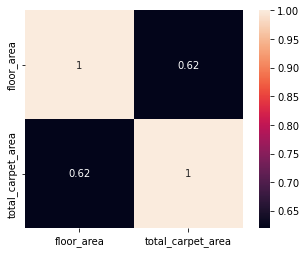

In [211]:
sns.heatmap(train_clean_encoded[['floor_area', 'total_carpet_area']].corr(), annot = True, square = True)

<AxesSubplot:xlabel='floor_area', ylabel='total_carpet_area'>

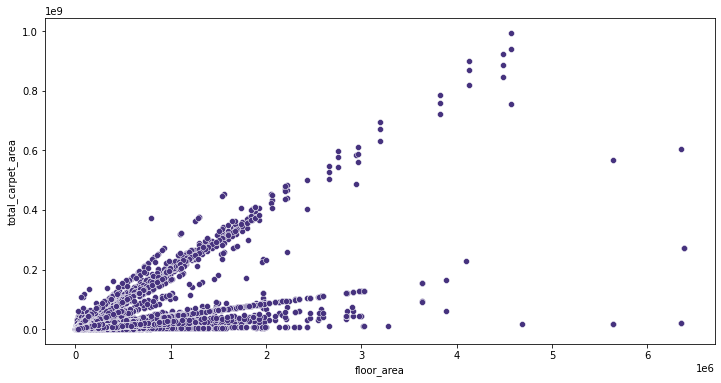

In [212]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = train_clean_encoded['floor_area'], y = train_clean_encoded['total_carpet_area'])

<AxesSubplot:xlabel='ELEVATION', ylabel='site_eui'>

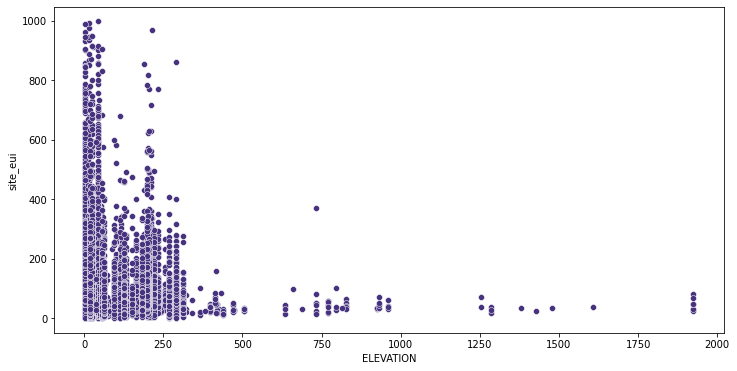

In [213]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x = train_clean_encoded['ELEVATION'], y = train_clean_encoded['site_eui'])

<AxesSubplot:>

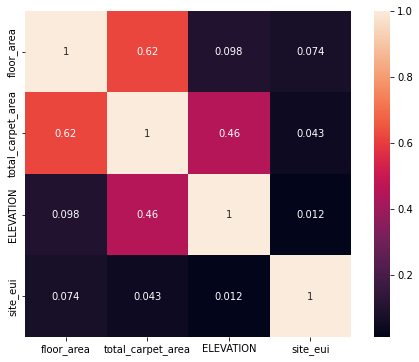

In [215]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_clean_encoded[['floor_area', 'total_carpet_area', 'ELEVATION', 'site_eui']].corr(), annot = True, square = True)

In [216]:
### Total Floor Area is not significant

train_clean_encoded.drop('total_carpet_area', axis = 1, inplace = True)
test_clean_encoded.drop('total_carpet_area', axis = 1, inplace = True)

In [217]:
### Let's create X_train, X_test, y_train, y_test

X_train = train_clean_encoded.drop('site_eui', axis = 1)
X_test = test_clean_encoded.copy()
y_train = train_clean_encoded['site_eui'].values
y_test = test_y['site_eui'].values

In [218]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75757, 55)
(9705, 55)
(75757,)
(9705,)


In [219]:
### Let's now build a baseline model

from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  44.446129759918385
R2 Score:  -0.02754027860539665


In [220]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  49.743072845871566
R2 Score:  0.11255104133978855


In [221]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=2)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  50.777325798375045
R2 Score:  0.05266811956363604


In [222]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(random_state=2)
cat.fit(X_train, y_train)

y_pred = cat.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

Learning rate set to 0.08112
0:	learn: 57.2897851	total: 175ms	remaining: 2m 54s
1:	learn: 56.3906809	total: 202ms	remaining: 1m 40s
2:	learn: 55.6221289	total: 230ms	remaining: 1m 16s
3:	learn: 54.6419004	total: 282ms	remaining: 1m 10s
4:	learn: 54.0317629	total: 362ms	remaining: 1m 11s
5:	learn: 53.4839612	total: 404ms	remaining: 1m 6s
6:	learn: 53.0115227	total: 439ms	remaining: 1m 2s
7:	learn: 52.5800319	total: 466ms	remaining: 57.8s
8:	learn: 51.9748870	total: 493ms	remaining: 54.2s
9:	learn: 51.3970801	total: 522ms	remaining: 51.7s
10:	learn: 51.0982954	total: 547ms	remaining: 49.1s
11:	learn: 50.8065137	total: 563ms	remaining: 46.4s
12:	learn: 50.5429679	total: 579ms	remaining: 44s
13:	learn: 50.3370185	total: 596ms	remaining: 42s
14:	learn: 50.1345365	total: 618ms	remaining: 40.6s
15:	learn: 49.9354392	total: 639ms	remaining: 39.3s
16:	learn: 49.5799480	total: 661ms	remaining: 38.2s
17:	learn: 49.4194546	total: 681ms	remaining: 37.1s
18:	learn: 49.0815927	total: 701ms	remaining

In [223]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(random_state=2)
adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  91.18150856202556
R2 Score:  -4.954977127775735


In [224]:
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor

gbm = GradientBoostingRegressor(random_state=2)
gbm.fit(X_train, y_train)

y_pred = gbm.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))


hist_gbm = HistGradientBoostingRegressor(random_state=2)
hist_gbm.fit(X_train, y_train)

y_pred = hist_gbm.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  46.04597620739549
R2 Score:  -0.277579433844684
RMSE:  44.786464872723045
R2 Score:  -0.061592640393301146


In [225]:
from sklearn.ensemble import ExtraTreesRegressor

etree = ExtraTreesRegressor(random_state=2)
etree.fit(X_train, y_train)

y_pred = etree.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  45.86809397213123
R2 Score:  -0.02262174366852099


In [230]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_depth = 6, random_state=2)
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  54.015452530152075
R2 Score:  -0.4794669863032286


## Feature Selection
- Best Models are LightGBM Regressor, Random Forest Regressor (positive R Square) and Hist Gradient Boosting Regressor
- We will use some feature selection methods to see if we can remove redundant features

### Filter Methods

In [232]:
from sklearn.feature_selection import VarianceThreshold

### Removing Constant Features

constant_filter = VarianceThreshold(threshold = 0)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0)

In [235]:
X_train.shape

(75757, 55)

In [234]:
constant_filter.get_support().sum()

55

In [236]:
### We don't have constant features
### Let's check quasi constant

quasi_constant = VarianceThreshold(threshold = 0.01)
quasi_constant.fit(X_train)

VarianceThreshold(threshold=0.01)

In [237]:
quasi_constant.get_support().sum()

55

In [238]:
### We don't have any constant or quasi constant features

### Forward Feature Selection

In [248]:
from mlxtend.feature_selection import SequentialFeatureSelector

forward_feature_selection = SequentialFeatureSelector(LGBMRegressor(),
                                                       k_features = (1, 55), 
                                                       forward = True, 
                                                       floating = False, 
                                                       verbose = 3, 
                                                       scoring = 'neg_mean_squared_error', 
                                                       cv = 5, n_jobs = -1).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:   19.3s finished

[2022-07-24 03:19:21] Features: 1/55 -- score: -2862.085186094346[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   21.3s finished

[2022-07-24 03:19:42] Features: 2/55 -- score: -2409.001646109931[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   22.2s finished

[2022-07-24 03:20:05] Features: 3/55 -- score: -2350.7903180046596[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  52 out 

In [260]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict())[12].iloc[3]

('Year_Factor',
 'facility_type',
 'energy_star_rating',
 'march_max_temp',
 'september_max_temp',
 'october_max_temp',
 'november_max_temp',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'facility_category',
 'building_class_Residential')

In [262]:
X_train_ffs = X_train[['Year_Factor',
 'facility_type',
 'energy_star_rating',
 'march_max_temp',
 'september_max_temp',
 'october_max_temp',
 'november_max_temp',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'facility_category',
 'building_class_Residential']]

In [263]:
X_train_ffs.head()

,Year_Factor,facility_type,energy_star_rating,march_max_temp,september_max_temp,october_max_temp,november_max_temp,days_above_90F,days_above_100F,days_above_110F,facility_category,building_class_Residential
0,1,13,11.0,80.0,90.0,83.0,72.0,0.0,0.0,0.0,6,0
1,1,55,45.0,80.0,90.0,83.0,72.0,0.0,0.0,0.0,20,0
2,1,48,97.0,80.0,90.0,83.0,72.0,0.0,0.0,0.0,18,0
3,1,6,46.0,80.0,90.0,83.0,72.0,0.0,0.0,0.0,4,0
4,1,56,100.0,80.0,90.0,83.0,72.0,0.0,0.0,0.0,20,0


In [264]:
X_test_ffs = X_test[['Year_Factor',
 'facility_type',
 'energy_star_rating',
 'march_max_temp',
 'september_max_temp',
 'october_max_temp',
 'november_max_temp',
 'days_above_90F',
 'days_above_100F',
 'days_above_110F',
 'facility_category',
 'building_class_Residential']]

In [267]:
lgbm = LGBMRegressor()
lgbm.fit(X_train_ffs, y_train)

y_pred = lgbm.predict(X_test_ffs)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  47.21749968342601
R2 Score:  0.003922844297218231


In [268]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red', alpha = 0.5, s = 100)
    plt.title(regressorName)
    plt.show()
    return

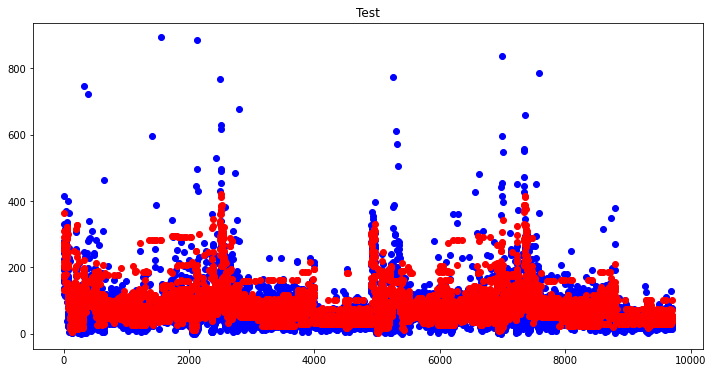

In [269]:
plt.figure(figsize = (12, 6))
plotGraph(y_test, y_pred, "Test")

In [266]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_ffs, y_train)

y_pred = rf_reg.predict(X_test_ffs)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  54.35939432197332
R2 Score:  0.09152394965858268


In [271]:
X_train.to_csv('X_train_v3.csv', index = False)
X_test.to_csv('X_test_v3.csv', index = False)

In [272]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

y_train.to_csv('y_train_v3.csv', index = False)
y_test.to_csv('y_test_v3.csv', index = False)

### Recursive Feature Elimination

In [3]:
X_train = pd.read_csv('X_train_v3.csv')
X_test = pd.read_csv('X_test_v3.csv')
y_train = pd.read_csv('y_train_v3.csv')
y_test = pd.read_csv('y_test_v3.csv')

In [4]:
from sklearn.feature_selection import RFE
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

rfe = RFE(estimator = LGBMRegressor(), step = 1)
rfe = rfe.fit(X_train, y_train)

In [5]:
selected_rfe_features = pd.DataFrame({'Features': list(X_train.columns), 
                                      'Ranking': rfe.ranking_})

selected_rfe_features.sort_values(by = 'Ranking')

,Features,Ranking
0,Year_Factor,1
45,days_below_30F,1
44,snowfall_inches,1
41,december_max_temp,1
38,november_max_temp,1
37,november_avg_temp,1
36,november_min_temp,1
31,september_avg_temp,1
28,august_avg_temp,1
25,july_avg_temp,1


In [6]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [7]:
lgbm = LGBMRegressor()
lgbm.fit(X_train_rfe, y_train)

lgbm_y_pred = lgbm.predict(X_test_rfe)

mse = mean_squared_error(lgbm_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(lgbm_y_pred, y_test))

RMSE:  46.25169080101522
R2 Score:  -0.0384503384111472


In [8]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

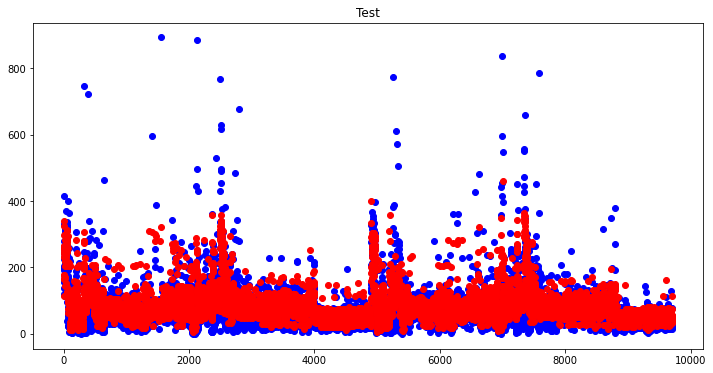

In [10]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, lgbm_y_pred, "Test")

In [11]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rfe, y_train)

rf_y_pred = rf_reg.predict(X_test_rfe)

mse = mean_squared_error(rf_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(rf_y_pred, y_test))

RMSE:  45.3759568428605
R2 Score:  0.16747715336612168


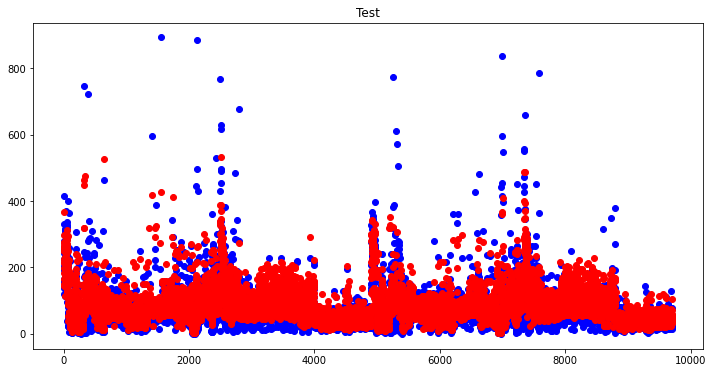

In [12]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, rf_y_pred, "Test")

In [13]:
from sklearn.ensemble import HistGradientBoostingRegressor

hist_gbr = HistGradientBoostingRegressor()
hist_gbr.fit(X_train_rfe, y_train)

hgbm_y_pred = hist_gbr.predict(X_test_rfe)

mse = mean_squared_error(hgbm_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(hgbm_y_pred, y_test))

RMSE:  44.674396875815106
R2 Score:  -0.007301093987264418


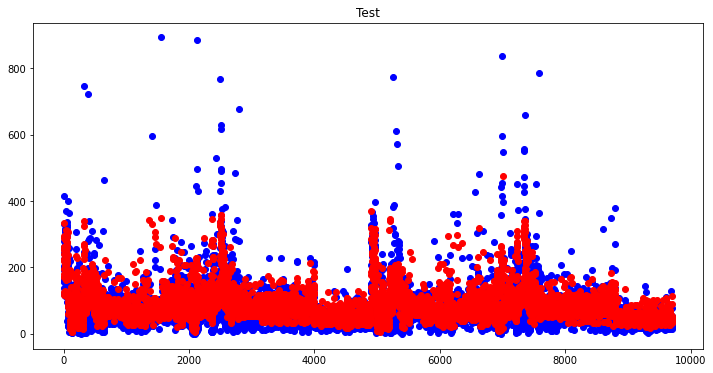

In [14]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, hgbm_y_pred, "Test")

In [15]:
### Comparing the train scores for all the models to see how much each of them are overfitting

lgbm_y_pred = lgbm.predict(X_train_rfe)

mse = mean_squared_error(lgbm_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(lgbm_y_pred, y_train))

RMSE:  40.40347562409927
R2 Score:  -0.13838364430947458


In [16]:
rf_y_pred = rf_reg.predict(X_train_rfe)

mse = mean_squared_error(rf_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(rf_y_pred, y_train))

RMSE:  16.479298159336462
R2 Score:  0.8865422567257658


In [17]:
selected_rfe_features[selected_rfe_features['Ranking']==1]['Features'].values

array(['Year_Factor', 'State_Factor', 'facility_type', 'floor_area',
       'energy_star_rating', 'ELEVATION', 'january_avg_temp',
       'january_max_temp', 'february_max_temp', 'march_avg_temp',
       'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'may_avg_temp', 'may_max_temp', 'june_min_temp', 'july_min_temp',
       'july_avg_temp', 'august_avg_temp', 'september_avg_temp',
       'november_min_temp', 'november_avg_temp', 'november_max_temp',
       'december_max_temp', 'snowfall_inches', 'days_below_30F',
       'building_class_Residential'], dtype=object)

In [18]:
X_train_rfe_new = pd.DataFrame(X_train_rfe, columns = selected_rfe_features[selected_rfe_features['Ranking']==1]['Features'].values)
X_train_rfe_new.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,february_max_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,may_avg_temp,may_max_temp,june_min_temp,july_min_temp,july_avg_temp,august_avg_temp,september_avg_temp,november_min_temp,november_avg_temp,november_max_temp,december_max_temp,snowfall_inches,days_below_30F,building_class_Residential
0,1.0,0.0,13.0,61242.0,11.0,2.4,50.5,68.0,73.0,53.693548,80.0,41.0,55.5,56.854839,84.0,50.0,52.0,62.725806,62.16129,64.65,43.0,53.8,72.0,71.0,0.0,0.0,0.0
1,1.0,0.0,55.0,274000.0,45.0,1.8,50.5,68.0,73.0,53.693548,80.0,41.0,55.5,56.854839,84.0,50.0,52.0,62.725806,62.16129,64.65,43.0,53.8,72.0,71.0,0.0,0.0,0.0
2,1.0,0.0,48.0,280025.0,97.0,1.8,50.5,68.0,73.0,53.693548,80.0,41.0,55.5,56.854839,84.0,50.0,52.0,62.725806,62.16129,64.65,43.0,53.8,72.0,71.0,0.0,0.0,0.0
3,1.0,0.0,6.0,55325.0,46.0,1.8,50.5,68.0,73.0,53.693548,80.0,41.0,55.5,56.854839,84.0,50.0,52.0,62.725806,62.16129,64.65,43.0,53.8,72.0,71.0,0.0,0.0,0.0
4,1.0,0.0,56.0,66000.0,100.0,2.4,50.5,68.0,73.0,53.693548,80.0,41.0,55.5,56.854839,84.0,50.0,52.0,62.725806,62.16129,64.65,43.0,53.8,72.0,71.0,0.0,0.0,0.0


In [19]:
imp_features = pd.DataFrame({'Features': list(X_train_rfe_new.columns), 
                            'Ranking': rf_reg.feature_importances_})

imp_features.sort_values(by = 'Ranking', ascending = False)

,Features,Ranking
3,floor_area,0.290640
4,energy_star_rating,0.280630
2,facility_type,0.229925
5,ELEVATION,0.048192
1,State_Factor,0.015640
26,building_class_Residential,0.015599
24,snowfall_inches,0.008845
6,january_avg_temp,0.007053
17,july_avg_temp,0.006836
12,april_avg_temp,0.006832


In [20]:
hgbm_y_pred = hist_gbr.predict(X_train_rfe)

mse = mean_squared_error(hgbm_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(hgbm_y_pred, y_train))

RMSE:  40.574777729875095
R2 Score:  -0.15495974635756626


In [21]:
### Using only 6 features that we get with Random Forest Feature Importance

cols = ['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor', 'building_class_Residential', 'snowfall_inches']

X_train_rf_imp = X_train_rfe_new[cols]
X_train_rf_imp.head()

,floor_area,energy_star_rating,facility_type,ELEVATION,State_Factor,building_class_Residential,snowfall_inches
0,61242.0,11.0,13.0,2.4,0.0,0.0,0.0
1,274000.0,45.0,55.0,1.8,0.0,0.0,0.0
2,280025.0,97.0,48.0,1.8,0.0,0.0,0.0
3,55325.0,46.0,6.0,1.8,0.0,0.0,0.0
4,66000.0,100.0,56.0,2.4,0.0,0.0,0.0


In [22]:
X_test_rfe_new = pd.DataFrame(X_test_rfe, columns = selected_rfe_features[selected_rfe_features['Ranking']==1]['Features'].values)
X_test_rfe_new.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,february_max_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,may_avg_temp,may_max_temp,june_min_temp,july_min_temp,july_avg_temp,august_avg_temp,september_avg_temp,november_min_temp,november_avg_temp,november_max_temp,december_max_temp,snowfall_inches,days_below_30F,building_class_Residential
0,7.0,0.0,13.0,28484.0,37.0,2.4,50.596774,64.0,66.0,56.935484,77.0,45.0,58.45,60.903226,87.0,51.0,53.0,64.258065,65.854839,69.766667,43.0,58.05,69.0,66.0,0.0,0.0,0.0
1,7.0,0.0,13.0,21906.0,55.0,45.7,50.596774,64.0,66.0,56.935484,77.0,45.0,58.45,60.903226,87.0,51.0,53.0,64.258065,65.854839,69.766667,43.0,58.05,69.0,66.0,0.0,0.0,0.0
2,7.0,0.0,13.0,16138.0,1.0,59.1,50.596774,64.0,66.0,56.935484,77.0,45.0,58.45,60.903226,87.0,51.0,53.0,64.258065,65.854839,69.766667,43.0,58.05,69.0,66.0,0.0,0.0,0.0
3,7.0,0.0,13.0,97422.0,34.0,35.4,50.596774,64.0,66.0,56.935484,77.0,45.0,58.45,60.903226,87.0,51.0,53.0,64.258065,65.854839,69.766667,43.0,58.05,69.0,66.0,0.0,0.0,0.0
4,7.0,0.0,13.0,61242.0,35.0,1.8,50.596774,64.0,66.0,56.935484,77.0,45.0,58.45,60.903226,87.0,51.0,53.0,64.258065,65.854839,69.766667,43.0,58.05,69.0,66.0,0.0,0.0,0.0


In [23]:
X_test_rf_imp = X_test_rfe_new[cols]
X_test_rf_imp.head()

,floor_area,energy_star_rating,facility_type,ELEVATION,State_Factor,building_class_Residential,snowfall_inches
0,28484.0,37.0,13.0,2.4,0.0,0.0,0.0
1,21906.0,55.0,13.0,45.7,0.0,0.0,0.0
2,16138.0,1.0,13.0,59.1,0.0,0.0,0.0
3,97422.0,34.0,13.0,35.4,0.0,0.0,0.0
4,61242.0,35.0,13.0,1.8,0.0,0.0,0.0


In [24]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_rf_imp, y_train)

rf_y_pred = rf_reg.predict(X_test_rf_imp)

mse = mean_squared_error(rf_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(rf_y_pred, y_test))

RMSE:  45.710074135419944
R2 Score:  0.17439348424823586


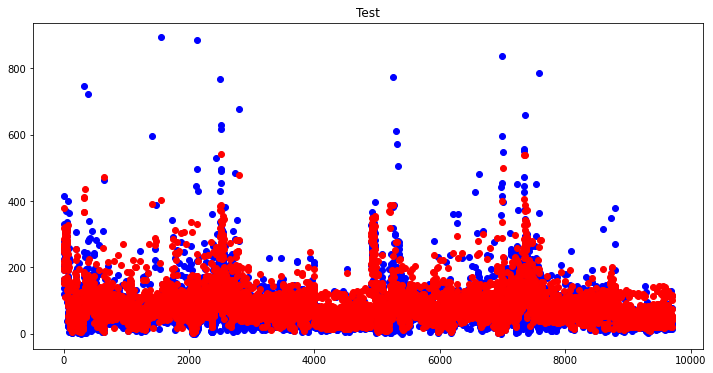

In [25]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, rf_y_pred, "Test")

In [26]:
rf_y_pred = rf_reg.predict(X_train_rf_imp)

mse = mean_squared_error(rf_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(rf_y_pred, y_train))

RMSE:  15.69794308130536
R2 Score:  0.9002032636979221


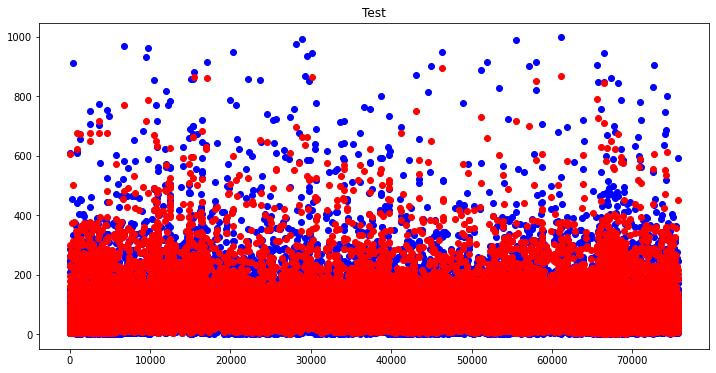

In [27]:
plt.figure(figsize = (12, 6))
plotGraph(y_train.values, rf_y_pred, "Test")

### Hyper Parameter Tuning Radom Forest as the R2 Score for Random Forest is the best

In [69]:
from sklearn.model_selection import GridSearchCV, KFold

# Create the random grid
random_grid = {'n_estimators': [100, 300, 500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [3, 4, 5],
               'min_samples_split': [20, 40, 60],
               'min_samples_leaf': [10, 30, 50]}

In [71]:
grid = GridSearchCV(estimator = RandomForestRegressor(random_state = 2),
                    param_grid = random_grid, 
                    cv = 5, scoring = 'neg_mean_squared_error', 
                    n_jobs = -1, verbose = 3)

grid.fit(X_train_rf_imp, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [10, 30, 50],
                         'min_samples_split': [20, 40, 60],
                         'n_estimators': [100, 300, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [72]:
grid.best_score_

-2663.87026031286

In [73]:
grid.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 30,
 'min_samples_split': 20,
 'n_estimators': 300}

In [74]:
y_pred = grid.predict(X_test_rf_imp)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  52.69138451155503
R2 Score:  -1.5594685174400227


- Score after parameter tuning has reduced
- So, we will now check with LightGBM Regressor and HistGradientBoosting Regressor

In [28]:
lgbm = LGBMRegressor(random_state = 2)
lgbm.fit(X_train_rf_imp, y_train)

lgbm_y_pred = lgbm.predict(X_test_rf_imp)

mse = mean_squared_error(lgbm_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(lgbm_y_pred, y_test))

RMSE:  42.85994602251647
R2 Score:  0.052809587242324096


In [29]:
hist_gbr = HistGradientBoostingRegressor(random_state = 2)
hist_gbr.fit(X_train_rf_imp, y_train)

hgbm_y_pred = hist_gbr.predict(X_test_rf_imp)

mse = mean_squared_error(hgbm_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(hgbm_y_pred, y_test))

RMSE:  42.86891998777429
R2 Score:  0.06778908376310944


In [30]:
lgbm_y_pred = lgbm.predict(X_train_rf_imp)

mse = mean_squared_error(lgbm_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(lgbm_y_pred, y_train))

RMSE:  40.577463199921475
R2 Score:  -0.1524047063151297


In [31]:
hist_y_pred = hist_gbr.predict(X_train_rf_imp)

mse = mean_squared_error(hist_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(hist_y_pred, y_train))

RMSE:  40.740725392283046
R2 Score:  -0.16308681181013873


In [115]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor(iterations = 2500,
                         learning_rate = 0.01,
                         depth = 4,
                         eval_metric='RMSE',
#                        early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)

catb.fit(X_train_rf_imp, y_train)
y_pred = catb.predict(X_test_rf_imp)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

0:	learn: 58.1566615	total: 20.1ms	remaining: 50.1s
75:	learn: 53.6026714	total: 536ms	remaining: 17.1s
150:	learn: 51.1867980	total: 946ms	remaining: 14.7s
225:	learn: 49.2901772	total: 1.36s	remaining: 13.7s
300:	learn: 48.2853459	total: 2.06s	remaining: 15s
375:	learn: 47.5558352	total: 2.47s	remaining: 14s
450:	learn: 47.0092687	total: 3.15s	remaining: 14.3s
525:	learn: 46.5693273	total: 3.48s	remaining: 13.1s
600:	learn: 46.2467854	total: 3.8s	remaining: 12s
675:	learn: 45.9892566	total: 4.23s	remaining: 11.4s
750:	learn: 45.7696403	total: 4.7s	remaining: 10.9s
825:	learn: 45.5567091	total: 5.03s	remaining: 10.2s
900:	learn: 45.3646968	total: 5.49s	remaining: 9.74s
975:	learn: 45.1778711	total: 5.91s	remaining: 9.23s
1050:	learn: 44.9934346	total: 6.3s	remaining: 8.68s
1125:	learn: 44.8575302	total: 6.79s	remaining: 8.29s
1200:	learn: 44.7102402	total: 7.22s	remaining: 7.81s
1275:	learn: 44.5795095	total: 7.62s	remaining: 7.31s
1350:	learn: 44.4687094	total: 7.98s	remaining: 6.79s

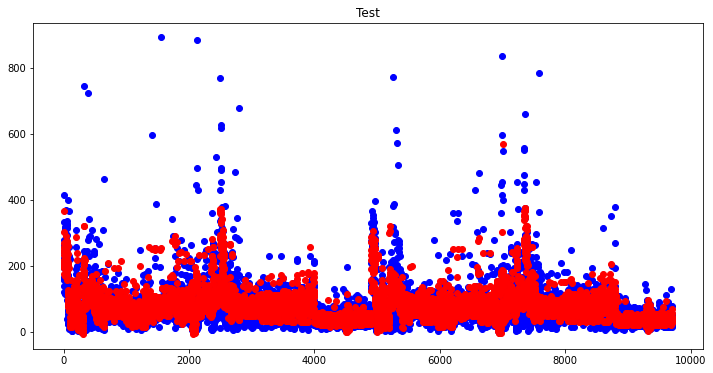

In [116]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, y_pred, "Test")

In [117]:
cat_y_pred = catb.predict(X_train_rf_imp)

mse = mean_squared_error(cat_y_pred, y_train)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(cat_y_pred, y_train))

RMSE:  43.2813247058667
R2 Score:  -0.45248233369607216


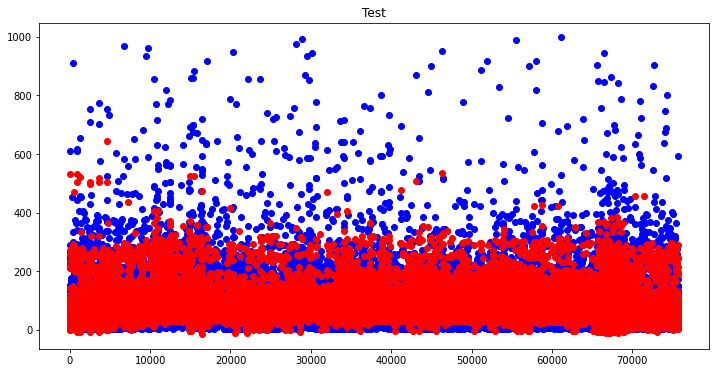

In [118]:
plt.figure(figsize = (12, 6))
plotGraph(y_train.values, cat_y_pred, "Test")

In [126]:
### Both LGBM and HistGBM are giving almost the same score
### We have also tried Catboost with different parameters manually (due to low computation power)
### Let's hyperparameter tune LightGBM now

In [41]:
import optuna
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# cross validating training data
kfolds = KFold(n_splits = 3, shuffle = True, random_state = 2)

# Objective function
def lgbm_objective(trial, data = X_train_rf_imp, target = y_train):
    # Dictionary to store best parameters
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
     
    model = LGBMRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits = 10, shuffle = True, random_state = 2)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [42]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials = n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [43]:
%%time
lgbm_param, lgbm_score = tuner(lgbm_objective, 1)
lgbm_tuned_model = LGBMRegressor(**lgbm_param)

[I 2022-07-25 01:01:39,658] A new study created in memory with name: no-name-f855bf35-337d-4915-9829-7f3e51ca2372


[LightGBM] [Warning] feature_fraction is set=0.6250133502167637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6250133502167637
[LightGBM] [Warning] lambda_l1 is set=1.1595910662725852e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1595910662725852e-06
[LightGBM] [Warning] bagging_fraction is set=0.5135312499832065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5135312499832065
[LightGBM] [Warning] lambda_l2 is set=0.03970536941037689, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03970536941037689
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6250133502167637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6250133502167637
[LightGBM] [Warning] lambda_l1 is set=1.1595910662725852e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1595910662725852e-06
[LightGBM] [Warning

[I 2022-07-25 01:01:40,582] Trial 0 finished with value: -100.22834601562064 and parameters: {'lambda_l1': 1.1595910662725852e-06, 'lambda_l2': 0.03970536941037689, 'num_leaves': 77, 'feature_fraction': 0.6250133502167637, 'bagging_fraction': 0.5135312499832065, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 0 with value: -100.22834601562064.


Best score: -100.22834601562064
Optimized parameters: {'lambda_l1': 1.1595910662725852e-06, 'lambda_l2': 0.03970536941037689, 'num_leaves': 77, 'feature_fraction': 0.6250133502167637, 'bagging_fraction': 0.5135312499832065, 'bagging_freq': 2, 'min_child_samples': 40}

<<<<<<<<<< Tuning complete... >>>>>>>>>>
CPU times: total: 4.73 s
Wall time: 925 ms


In [44]:
lgbm_tuned_model.fit(X_train_rf_imp, y_train)

[LightGBM] [Warning] feature_fraction is set=0.6250133502167637, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6250133502167637
[LightGBM] [Warning] lambda_l1 is set=1.1595910662725852e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1595910662725852e-06
[LightGBM] [Warning] bagging_fraction is set=0.5135312499832065, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5135312499832065
[LightGBM] [Warning] lambda_l2 is set=0.03970536941037689, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03970536941037689
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


LGBMRegressor(bagging_fraction=0.5135312499832065, bagging_freq=2,
              feature_fraction=0.6250133502167637,
              lambda_l1=1.1595910662725852e-06, lambda_l2=0.03970536941037689,
              min_child_samples=40, num_leaves=77)

In [45]:
lgbm_y_pred = lgbm_tuned_model.predict(X_test_rf_imp)

mse = mean_squared_error(lgbm_y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(lgbm_y_pred, y_test))

RMSE:  42.46706919966537
R2 Score:  0.0959940938879702


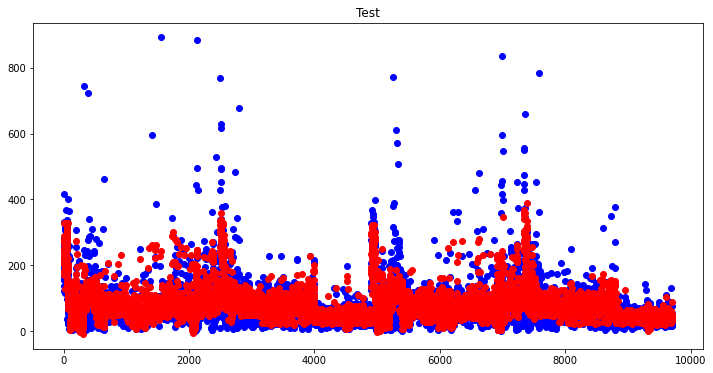

In [46]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, lgbm_y_pred, "Test")

In [48]:
import joblib

with open('lgbm_tuned_final.joblib', 'wb') as f:
    joblib.dump(lgbm_tuned_model, f, compress=1)

### We will try an ensemble of algorithms as well
- We will try and build a KNN and SVR model to see if they perform well
- We will also create an ensemble of boosting algorithms that perfermed almost similar

In [4]:
X_train = pd.read_csv('Datasets/X_train_v3.csv')
X_test = pd.read_csv('Datasets/X_test_v3.csv')
y_train = pd.read_csv('Datasets/y_train_v3.csv')
y_test = pd.read_csv('Datasets/y_test_v3.csv')

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [6]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [7]:
X_train_scaled.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,facility_category,building_class_Residential
0,0.0,0.0,0.220339,0.009445,0.11,0.000312,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.44186,0.866667,0.670628,0.659091,0.023242,0.340194,0.0,0.0,0.0,0.0,0.0,0.053846,0.0,0.0,0.0,0.3,0.0
1,0.0,0.0,0.932203,0.042769,0.45,0.000000,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.44186,0.866667,0.670628,0.659091,0.023242,0.340194,0.0,0.0,0.0,0.0,0.0,0.053846,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.813559,0.043713,0.97,0.000000,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.44186,0.866667,0.670628,0.659091,0.023242,0.340194,0.0,0.0,0.0,0.0,0.0,0.053846,0.0,0.0,0.0,0.9,0.0
3,0.0,0.0,0.101695,0.008518,0.46,0.000000,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.44186,0.866667,0.670628,0.659091,0.023242,0.340194,0.0,0.0,0.0,0.0,0.0,0.053846,0.0,0.0,0.0,0.2,0.0
4,0.0,0.0,0.949153,0.010190,1.00,0.000312,0.808824,0.735725,0.530612,0.786885,0.720041,0.686275,0.803279,0.634093,0.642857,0.702703,0.444769,0.380952,0.657143,0.281684,0.416667,0.526316,0.180536,0.442308,0.405405,0.199511,0.365385,0.456522,0.143098,0.38,0.666667,0.302602,0.553191,0.674419,0.508277,0.489796,0.8125,0.628467,0.44186,0.866667,0.670628,0.659091,0.023242,0.340194,0.0,0.0,0.0,0.0,0.0,0.053846,0.0,0.0,0.0,1.0,0.0


In [9]:
### Building a KNN Regressor

knn = KNeighborsRegressor(n_neighbors = 21)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  49.97006816879829
R2 Score:  -0.2462714003844637


In [23]:
### Building an SVR Model

svr = SVR(C = 0.01, kernel='rbf')
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

In [9]:
### Building a LGBM Model to check the feature importance for LGBM specifically

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state = 2)
lgbm.fit(X_train_scaled, y_train)

y_pred = lgbm.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  44.709445136199264
R2 Score:  -0.031121071274597956


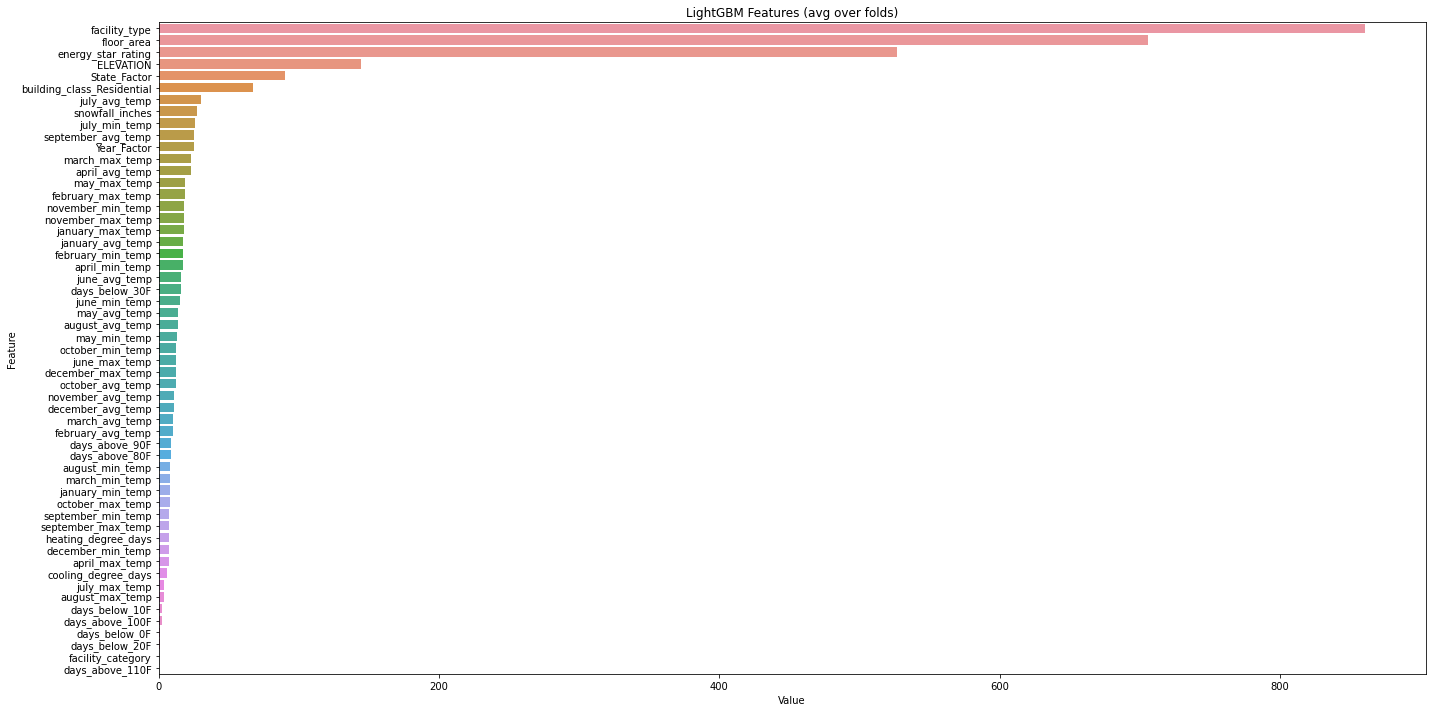

<Figure size 432x288 with 0 Axes>

In [10]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X_train_scaled.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x = "Value", y="Feature", data = feature_imp.sort_values(by = "Value", ascending = False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [8]:
X_train_scaled = X_train_scaled[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor', 'building_class_Residential']]
X_test_scaled = X_test_scaled[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor', 'building_class_Residential']]

In [12]:
lgbm = LGBMRegressor(random_state = 2)
lgbm.fit(X_train_scaled, y_train)

y_pred = lgbm.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  42.34211509104981
R2 Score:  0.13210994163506384


In [24]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

rf_reg = RandomForestRegressor(n_estimators = 300, max_depth = 4, random_state = 2)
hist_gbm = HistGradientBoostingRegressor(random_state = 2)
lgbm = LGBMRegressor(random_state = 2)

from catboost import CatBoostRegressor

catb = CatBoostRegressor(iterations = 2500,
                         learning_rate = 0.01,
                         depth = 4,
                         eval_metric='RMSE',
#                        early_stopping_rounds=42,
                         random_seed = 23,
                         bagging_temperature = 0.2,
                         od_type='Iter',
                         metric_period = 75,
                         od_wait=100)

ensemble = VotingRegressor([('rf', rf_reg), ('hist', hist_gbm), ('lgbm', lgbm), ('catb', catb)])
ensemble.fit(X_train_scaled, y_train)

0:	learn: 58.1570035	total: 160ms	remaining: 6m 41s
75:	learn: 53.5912185	total: 727ms	remaining: 23.2s
150:	learn: 51.1547386	total: 1.25s	remaining: 19.5s
225:	learn: 49.3630546	total: 1.77s	remaining: 17.8s
300:	learn: 48.3020832	total: 2.25s	remaining: 16.5s
375:	learn: 47.5979889	total: 2.77s	remaining: 15.6s
450:	learn: 46.9999038	total: 3.37s	remaining: 15.3s
525:	learn: 46.5998590	total: 3.91s	remaining: 14.7s
600:	learn: 46.2948093	total: 4.46s	remaining: 14.1s
675:	learn: 46.0204391	total: 4.97s	remaining: 13.4s
750:	learn: 45.7744884	total: 5.54s	remaining: 12.9s
825:	learn: 45.5790694	total: 6.1s	remaining: 12.4s
900:	learn: 45.3646733	total: 6.69s	remaining: 11.9s
975:	learn: 45.2051597	total: 7.24s	remaining: 11.3s
1050:	learn: 45.0420324	total: 7.78s	remaining: 10.7s
1125:	learn: 44.8984810	total: 8.27s	remaining: 10.1s
1200:	learn: 44.7465208	total: 8.77s	remaining: 9.48s
1275:	learn: 44.6355891	total: 9.32s	remaining: 8.95s
1350:	learn: 44.5379445	total: 9.82s	remainin

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=4,
                                                   n_estimators=300,
                                                   random_state=2)),
                            ('hist',
                             HistGradientBoostingRegressor(random_state=2)),
                            ('lgbm', LGBMRegressor(random_state=2)),
                            ('catb',
                             <catboost.core.CatBoostRegressor object at 0x00000168B7646D10>)])

In [25]:
y_pred = ensemble.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  43.687004223116844
R2 Score:  -0.1605779457338139


In [26]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

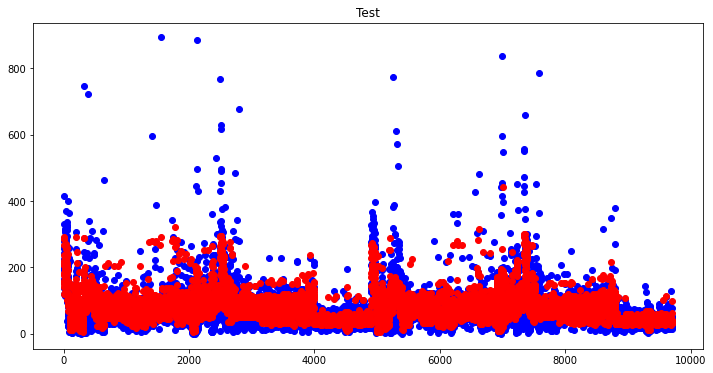

In [27]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, y_pred, "Test")

In [21]:
params = {'weights': [(1, 1, 1), (1, 1, 2), (1, 2, 1), (2, 1, 1)]}

grid = GridSearchCV(ensemble, params, cv = 3, n_jobs = -1, scoring = 'neg_mean_squared_error', verbose = 3)
grid.fit(X_train_scaled, y_train)

grid.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'weights': (2, 1, 1)}

In [22]:
grid.best_score_

-2529.1209699162678

In [23]:
y_pred = grid.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  45.909612948680156
R2 Score:  -0.5852692364853316


In [42]:
X_train = pd.read_csv('X_train_v3.csv')
X_test = pd.read_csv('X_test_v3.csv')
y_train = pd.read_csv('y_train_v3.csv')
y_test = pd.read_csv('y_test_v3.csv')

In [43]:
X_train.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,facility_category,building_class_Residential
0,1,0,13,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,6,0
1,1,0,55,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,20,0
2,1,0,48,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,18,0
3,1,0,6,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,4,0
4,1,0,56,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,20,0


In [44]:
# extract new weather statistics from the building location weather features
temp = [col for col in X_train.columns if 'temp' in col]

X_train['min_temp'] = X_train[temp].min(axis=1)
X_train['max_temp'] = X_train[temp].max(axis=1)
X_train['avg_temp'] = X_train[temp].mean(axis=1)

# by seasons
temp = pd.Series([col for col in X_train.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
X_train['min_winter_temp'] = X_train[winter_temp].min(axis=1)
X_train['max_winter_temp'] = X_train[winter_temp].max(axis=1)
X_train['avg_winter_temp'] = X_train[winter_temp].mean(axis=1)

### spring
X_train['min_spring_temp'] = X_train[spring_temp].min(axis=1)
X_train['max_spring_temp'] = X_train[spring_temp].max(axis=1)
X_train['avg_spring_temp'] = X_train[spring_temp].mean(axis=1)

### summer
X_train['min_summer_temp'] = X_train[summer_temp].min(axis=1)
X_train['max_summer_temp'] = X_train[summer_temp].max(axis=1)
X_train['avg_summer_temp'] = X_train[summer_temp].mean(axis=1)

## autumn
X_train['min_autumn_temp'] = X_train[autumn_temp].min(axis=1)
X_train['max_autumn_temp'] = X_train[autumn_temp].max(axis=1)
X_train['avg_autumn_temp'] = X_train[autumn_temp].mean(axis=1)

In [45]:
X_train.head()

,Year_Factor,State_Factor,facility_type,floor_area,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,february_max_temp,march_min_temp,march_avg_temp,march_max_temp,april_min_temp,april_avg_temp,april_max_temp,may_min_temp,may_avg_temp,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,august_max_temp,september_min_temp,september_avg_temp,september_max_temp,october_min_temp,october_avg_temp,october_max_temp,november_min_temp,november_avg_temp,november_max_temp,december_min_temp,december_avg_temp,december_max_temp,cooling_degree_days,heating_degree_days,snowfall_inches,days_below_30F,days_below_20F,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,facility_category,building_class_Residential,min_temp,max_temp,avg_temp,min_winter_temp,max_winter_temp,avg_winter_temp,min_spring_temp,max_spring_temp,avg_spring_temp,min_summer_temp,max_summer_temp,avg_summer_temp,min_autumn_temp,max_autumn_temp,avg_autumn_temp
0,1,0,13,61242.0,11.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,6,0,35.0,90.0,60.312919,35.0,73.0,52.151498,40.0,84.0,59.449821,50.0,90.0,66.487455,43.0,90.0,63.162903
1,1,0,55,274000.0,45.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,20,0,35.0,90.0,60.312919,35.0,73.0,52.151498,40.0,84.0,59.449821,50.0,90.0,66.487455,43.0,90.0,63.162903
2,1,0,48,280025.0,97.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,18,0,35.0,90.0,60.312919,35.0,73.0,52.151498,40.0,84.0,59.449821,50.0,90.0,66.487455,43.0,90.0,63.162903
3,1,0,6,55325.0,46.0,1.8,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,4,0,35.0,90.0,60.312919,35.0,73.0,52.151498,40.0,84.0,59.449821,50.0,90.0,66.487455,43.0,90.0,63.162903
4,1,0,56,66000.0,100.0,2.4,36.0,50.5,68.0,35.0,50.589286,73.0,40.0,53.693548,80.0,41.0,55.5,78.0,46.0,56.854839,84.0,50.0,60.5,90.0,52.0,62.725806,84.0,52.0,62.16129,85.0,52.0,64.65,90.0,47.0,63.016129,83.0,43.0,53.8,72.0,36.0,49.274194,71.0,115.0,2960.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,20,0,35.0,90.0,60.312919,35.0,73.0,52.151498,40.0,84.0,59.449821,50.0,90.0,66.487455,43.0,90.0,63.162903


In [46]:
X_train.drop(columns = X_train.iloc[:, 6 : 42], axis = 1, inplace = True)

In [47]:
# extract new weather statistics from the building location weather features
temp = [col for col in X_test.columns if 'temp' in col]

X_test['min_temp'] = X_test[temp].min(axis=1)
X_test['max_temp'] = X_test[temp].max(axis=1)
X_test['avg_temp'] = X_test[temp].mean(axis=1)

# by seasons
temp = pd.Series([col for col in X_test.columns if 'temp' in col])

winter_temp = temp[temp.apply(lambda x: ('january' in x or 'february' in x or 'december' in x))].values
spring_temp = temp[temp.apply(lambda x: ('march' in x or 'april' in x or 'may' in x))].values
summer_temp = temp[temp.apply(lambda x: ('june' in x or 'july' in x or 'august' in x))].values
autumn_temp = temp[temp.apply(lambda x: ('september' in x or 'october' in x or 'november' in x))].values


### winter
X_test['min_winter_temp'] = X_test[winter_temp].min(axis=1)
X_test['max_winter_temp'] = X_test[winter_temp].max(axis=1)
X_test['avg_winter_temp'] = X_test[winter_temp].mean(axis=1)

### spring
X_test['min_spring_temp'] = X_test[spring_temp].min(axis=1)
X_test['max_spring_temp'] = X_test[spring_temp].max(axis=1)
X_test['avg_spring_temp'] = X_test[spring_temp].mean(axis=1)

### summer
X_test['min_summer_temp'] = X_test[summer_temp].min(axis=1)
X_test['max_summer_temp'] = X_test[summer_temp].max(axis=1)
X_test['avg_summer_temp'] = X_test[summer_temp].mean(axis=1)

## autumn
X_test['min_autumn_temp'] = X_test[autumn_temp].min(axis=1)
X_test['max_autumn_temp'] = X_test[autumn_temp].max(axis=1)
X_test['avg_autumn_temp'] = X_test[autumn_temp].mean(axis=1)

In [48]:
X_test.drop(columns = X_test.iloc[:, 6 : 42], axis = 1, inplace = True)

In [49]:
lgbm = LGBMRegressor(random_state = 2)
lgbm.fit(X_train, y_train)

y_pred = lgbm.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  44.74415542160614
R2 Score:  -0.0687865661386089


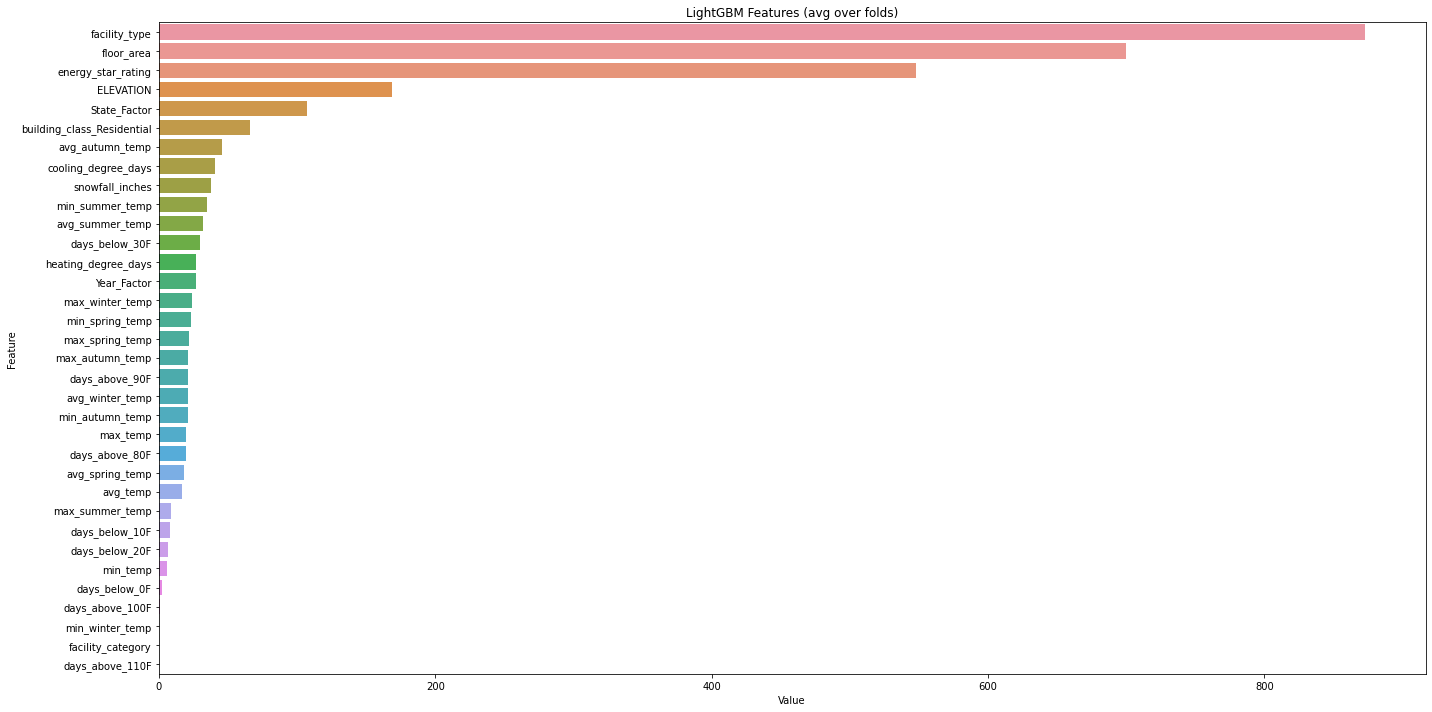

<Figure size 432x288 with 0 Axes>

In [50]:
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_, X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x = "Value", y="Feature", data = feature_imp.sort_values(by = "Value", ascending = False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [62]:
X_train = X_train[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor']]
X_test = X_test[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor']]

In [63]:
X_train_scaled = X_train[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor']]
X_test_scaled = X_test[['floor_area', 'energy_star_rating', 'facility_type', 'ELEVATION', 'State_Factor']]

In [61]:
lgbm = LGBMRegressor(random_state = 2)
lgbm.fit(X_train_scaled, y_train)

y_pred = lgbm.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  42.74718012884636
R2 Score:  0.10907680596873104


In [54]:
import optuna
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# cross validating training data
kfolds = KFold(n_splits = 3, shuffle = True, random_state = 2)

# Objective function
def lgbm_objective(trial, data = X_train_scaled, target = y_train):
    # Dictionary to store best parameters
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
     
    model = LGBMRegressor(**param)
    
    # Setting random seed and kfolds for cross-validation
    kfolds = KFold(n_splits = 10, shuffle = True, random_state = 2)
    
    scores = cross_val_score(model, data, target, cv=kfolds, scoring="neg_root_mean_squared_error")
    return scores.mean()

In [55]:
def tuner(objective, n=5, direction='minimize'): 
    # Create Study object
    study = optuna.create_study(direction="minimize")

    # Optimize the study
    study.optimize(objective, n_trials = n)

    # Print the result
    best_params = study.best_params
    best_score = study.best_value
    print(f"Best score: {best_score}")
    print(f"Optimized parameters: {best_params}\n")
    print("<<<<<<<<<< Tuning complete... >>>>>>>>>>")
    
    # Return best parameters for the model
    return best_params, best_score

In [56]:
%%time
lgbm_param, lgbm_score = tuner(lgbm_objective, 1)
lgbm_tuned_model = LGBMRegressor(**lgbm_param)

[I 2022-07-26 01:33:38,273] A new study created in memory with name: no-name-78025a9a-02d0-4314-a593-f9e2fba878da


[LightGBM] [Warning] feature_fraction is set=0.542268742091583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542268742091583
[LightGBM] [Warning] lambda_l1 is set=0.002765807755940603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002765807755940603
[LightGBM] [Warning] bagging_fraction is set=0.9493868319821289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9493868319821289
[LightGBM] [Warning] lambda_l2 is set=0.00011291535749143274, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011291535749143274
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.542268742091583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542268742091583
[LightGBM] [Warning] lambda_l1 is set=0.002765807755940603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002765807755940603
[LightGBM] [Warning] bagg

[I 2022-07-26 01:33:39,211] Trial 0 finished with value: -100.22834601562064 and parameters: {'lambda_l1': 0.002765807755940603, 'lambda_l2': 0.00011291535749143274, 'num_leaves': 113, 'feature_fraction': 0.542268742091583, 'bagging_fraction': 0.9493868319821289, 'bagging_freq': 5, 'min_child_samples': 79}. Best is trial 0 with value: -100.22834601562064.


[LightGBM] [Warning] feature_fraction is set=0.542268742091583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542268742091583
[LightGBM] [Warning] lambda_l1 is set=0.002765807755940603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002765807755940603
[LightGBM] [Warning] bagging_fraction is set=0.9493868319821289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9493868319821289
[LightGBM] [Warning] lambda_l2 is set=0.00011291535749143274, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011291535749143274
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.542268742091583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542268742091583
[LightGBM] [Warning] lambda_l1 is set=0.002765807755940603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002765807755940603
[LightGBM] [Warning] bagg

In [57]:
lgbm_tuned_model.fit(X_train_scaled, y_train)

[LightGBM] [Warning] feature_fraction is set=0.542268742091583, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.542268742091583
[LightGBM] [Warning] lambda_l1 is set=0.002765807755940603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002765807755940603
[LightGBM] [Warning] bagging_fraction is set=0.9493868319821289, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9493868319821289
[LightGBM] [Warning] lambda_l2 is set=0.00011291535749143274, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00011291535749143274
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


LGBMRegressor(bagging_fraction=0.9493868319821289, bagging_freq=5,
              feature_fraction=0.542268742091583,
              lambda_l1=0.002765807755940603, lambda_l2=0.00011291535749143274,
              min_child_samples=79, num_leaves=113)

In [58]:
y_pred = lgbm.predict(X_test_scaled)

mse = mean_squared_error(y_pred, y_test)
print('RMSE: ', np.sqrt(mse))
print('R2 Score: ', r2_score(y_pred, y_test))

RMSE:  42.74718012884636
R2 Score:  0.10907680596873104


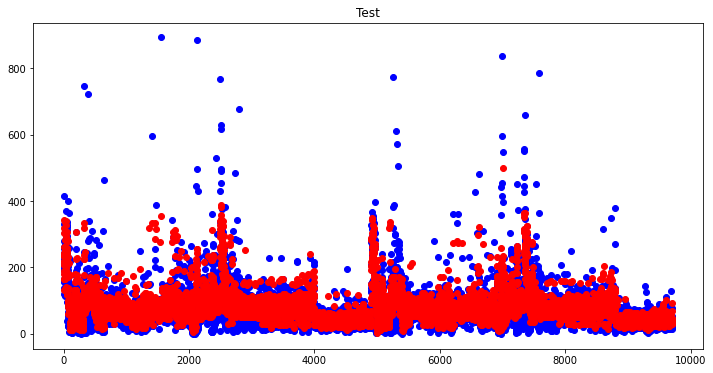

In [59]:
plt.figure(figsize = (12, 6))
plotGraph(y_test.values, y_pred, "Test")

# The ensembles of the boosting algos didn't give a better score
# So, we have kept the final model as the LGBM Regressor that we already trained